# Master TIDE - Conférences Python 2021

Francis Wolinski

&copy; 2021 Yotta Conseil


# 5. Opérations de pivot

Cette séance utilise les données accessibles sur le site de la Sécurité Sociale US.

Prénom, genre et nombre de naissances des enfants nés aux USA depuis 1880.

Seuls les prénoms avec au moins 5 naissances dans une année sont présents.

In [1]:
# import des modules usuels
import numpy as np
import pandas as pd
from pandas import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns

# options d'affichage
pd.set_option("display.max_rows", 16)
plt.style.use('seaborn-darkgrid')

In [2]:
# names
# https://www.ssa.gov/oact/babynames/names.zip

from os.path import exists

if exists("names.pkl"):   
    df = pd.read_pickle("names.pkl") # restauration à partir du format pickle

else:
    import glob # Python module qui implémente la fonction glob()

    files =  glob.glob('names/*.txt')  # lecture des fichiers .txt
    files.sort()
    dfs = []
    for filename in files:
        year = int(filename[-8:-4]) # extraction de l'année
        csv = pd.read_csv(filename, names=['name', 'gender', 'births']) # chargement d'un fichier unitaire
        csv['year'] = year # ajout de la colonne année
        dfs.append(csv)
        
    df = pd.concat(dfs, ignore_index=True) # concaténation de tous les DataFrames

    df = df[['year', 'name', 'gender', 'births']] # ordre des colonnes
    df.to_pickle("names.pkl") # sauvegarde au format pickle
    
df.shape

(2020863, 4)

In [3]:
df

,year,name,gender,births
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
2020858,2020,Zykell,M,5
2020859,2020,Zylus,M,5
2020860,2020,Zymari,M,5
2020861,2020,Zyn,M,5


## 5.1 Fonction `crosstab()`

La fonction `crosstab()` calcule les modalités croisées de deux facteurs (2 objets de type `Series` partageant le même index. Par ex, 2 colonnes d'un même `DataFrame`).

L'option `margine=True` calcule le total par ligne et par colonne. L'option `normalize=...` normalise les résultats en pourcentages compris entre 0 et 1 (`True` : toutes les valeurs, `index` : par ligne, `columns` par colonne).

Le résultat est un objet de type `DataFrame` : l'index comprend les différentes modalités de la première `Series` et les colonnes les différentes modalités de la seconde `Series`.

In [4]:
# ajout de la longueur des prénoms
df['length'] = df['name'].str.len()
df

,year,name,gender,births,length
0,1880,Mary,F,7065,4
1,1880,Anna,F,2604,4
2,1880,Emma,F,2003,4
3,1880,Elizabeth,F,1939,9
4,1880,Minnie,F,1746,6
...,...,...,...,...,...
2020858,2020,Zykell,M,5,6
2020859,2020,Zylus,M,5,5
2020860,2020,Zymari,M,5,6
2020861,2020,Zyn,M,5,3


In [5]:
# crosstable simple
pd.crosstab(df['length'], df['gender'])

gender,F,M
length,,
2,1728,3129
3,18888,24167
4,95327,91598
5,235230,190797
6,330131,245594
7,283617,160911
8,151467,71420
9,55686,26554
10,15340,9191


In [9]:
    pd.crosstab(df['length'], df['gender'], margins=True, normalize=True)*100

gender,F,M,All
length,,,
2,0.085508,0.154835,0.240343
3,0.934650,1.195875,2.130525
4,4.717143,4.532618,9.249761
5,11.640077,9.441362,21.081439
6,16.336140,12.152927,28.489066
7,14.034450,7.962489,21.996939
8,7.495164,3.534134,11.029298
9,2.755555,1.313993,4.069549
10,0.759082,0.454806,1.213887


In [11]:
    pd.crosstab(df['length'], df['gender'], normalize='index', margins=True)

gender,F,M
length,,
2,0.355775,0.644225
3,0.438695,0.561305
4,0.509975,0.490025
5,0.552148,0.447852
6,0.573418,0.426582
7,0.638018,0.361982
8,0.679569,0.320431
9,0.677116,0.322884
10,0.625331,0.374669


In [12]:
    pd.crosstab(df['length'], df['gender'], normalize='columns', margins=True)

gender,F,M,All
length,,,
2,0.001450,0.003776,0.002403
3,0.015844,0.029161,0.021305
4,0.079965,0.110526,0.092498
5,0.197322,0.230223,0.210814
6,0.276929,0.296343,0.284891
7,0.237911,0.194162,0.219969
8,0.127057,0.086178,0.110293
9,0.046712,0.032041,0.040695
10,0.012868,0.011090,0.012139


In [8]:
pd.crosstab(df['length'], df['gender'], margins=True)

gender,F,M,All
length,,,
2,0.085508,0.154835,0.240343
3,0.934650,1.195875,2.130525
4,4.717143,4.532618,9.249761
5,11.640077,9.441362,21.081439
6,16.336140,12.152927,28.489066
7,14.034450,7.962489,21.996939
8,7.495164,3.534134,11.029298
9,2.755555,1.313993,4.069549
10,0.759082,0.454806,1.213887


## 5.2 La méthode `pivot_table()`

La méthode `pivot_table()` construit un tableau synthétique de valeurs agrégées et ventilées selon les différentes valeurs d'une ou plusieurs colonnes.

Elle retourne un nouveau `DataFrame` en fonction des paramètres fournis.

- values : colonnes du `DataFrame` initial dont les valeurs sont agrégées
- index : colonnes du `DataFrame` initial dont les valeurs sont utilisées en index
- columns : colonnes du `DataFrame` initial dont les valeurs sont utilisées en nom de colonnes
- aggfunc : fonction d'agrégation des valeurs, par défaut `numpy.mean` (calcul de la moyenne des valeurs), : mean, min, max, sum, count, nunique, median, fonction ou lambda.

In [13]:
# pivot table naissances par année et genres
var = df.pivot_table(values='births',
                    index='year',
                    columns='gender',
                    aggfunc='sum')
var

gender,F,M
year,,
1880,90994,110490
1881,91953,100738
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2016,1768360,1893917
2017,1722140,1846154
2018,1695654,1810309


In [14]:
# vérification
df.loc[(df['year']==1880)&(df['gender']=='F'), 'births'].sum()

90994

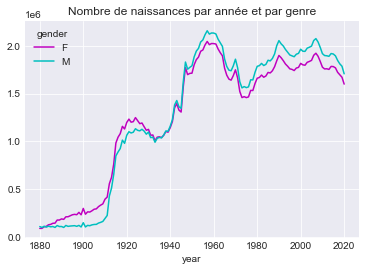

In [16]:
# graphique
var.plot(title='Nombre de naissances par année et par genre', color=['m', 'c']); # pour changer les couleurs par exemple color=['m', 'c']

In [17]:
# sans l'option columns
var = df.pivot_table(values='births',
            index='year',
            aggfunc='sum')
var

,births
year,
1880,201484
1881,192691
1882,221533
1883,216944
1884,243461
...,...
2016,3662277
2017,3568294
2018,3505963


<div class="alert alert-success">
<b>Exercice 1</b>
<ul>
    <li>Pivot tables avec le premier ou le dernier nom par ordre alphabétique par année et par genre.</li>
</ul>

In [18]:
var = df.pivot_table(values='name',
                    index='year',
                    columns='gender',
                    aggfunc='min')
var

gender,F,M
year,,
1880,Abbie,Aaron
1881,Abbie,Aaron
1882,Abbie,Aaron
1883,Abbie,Aaron
1884,Abbie,Aaron
...,...,...
2016,Aabha,Aaban
2017,Aabriella,Aaban
2018,Aabidah,Aaban


In [19]:
var = df.pivot_table(values='name',
                    index='year',
                    columns='gender',
                    aggfunc='max')
var

gender,F,M
year,,
1880,Zula,Zeke
1881,Zula,Zeb
1882,Zula,Zed
1883,Zula,Zeno
1884,Zula,Zollie
...,...,...
2016,Zyva,Zyrus
2017,Zyva,Zyrus
2018,Zyva,Zzyzx


In [21]:
var.index

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='year', length=141)

<div class="alert alert-success">
<b>Exercice 2</b>
<ul>
    <li>Pivot table avec la diversité des prénoms (nombre de prénoms différents) par année et par genre.</li>
    <li>Vérifier pour les femmes en 1880.</li>
    <li>Calcul de la différence de diversité des prénoms entre les hommes et les femmes par année</li>
    <li>Calcul du maximum de cette différence. Pour quelle année ?</li>
    <li>Faire un graphique.</li>
</ul>

In [22]:
%%time
var = df.pivot_table(values='name',
                    index='year',
                    columns='gender',
                    aggfunc='nunique')
var

Wall time: 2.15 s


gender,F,M
year,,
1880,942,1058
1881,938,996
1882,1028,1099
1883,1054,1030
1884,1172,1125
...,...,...
2016,18847,14184
2017,18404,14230
2018,18105,14073


In [23]:
%%time
var = df.pivot_table(values='name',
                    index='year',
                    columns='gender',
                    aggfunc='count')
var

Wall time: 540 ms


gender,F,M
year,,
1880,942,1058
1881,938,996
1882,1028,1099
1883,1054,1030
1884,1172,1125
...,...,...
2016,18847,14184
2017,18404,14230
2018,18105,14073


In [25]:
df.loc[(df['year']==1880)&(df['gender']=='F'), 'name'].count()

942

In [26]:
var['F']-var['M']

year
1880    -116
1881     -58
1882     -71
1883      24
1884      47
        ... 
2016    4663
2017    4174
2018    4032
2019    3866
2020    3449
Length: 141, dtype: int64

In [27]:
(var['F']-var['M']).max()

6178

In [28]:
(var['F']-var['M']).idxmax()

2007

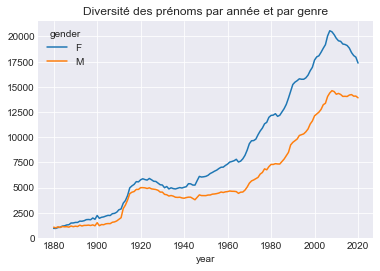

In [29]:
var.plot(title='Diversité des prénoms par année et par genre');

## 6. Gestion des valeurs manquantes et des doublons

### 6.1 Valeurs manquantes

Le module pandas possède des fonctions pour gérer les valeurs manquantes.

In [30]:
# pivot table of a subset of df with name equals to mary
var = df.loc[(df['name']=='Mary')]
tab = var.pivot_table(values='births',
                        index='year',
                        columns='gender')
tab

gender,F,M
year,,
1880,7065.0,27.0
1881,6919.0,29.0
1882,8148.0,30.0
1883,8012.0,32.0
1884,9217.0,36.0
...,...,...
2016,2520.0,NaN
2017,2416.0,NaN
2018,2352.0,NaN


On constate que la valeur `NaN` est affichée dans certaines lignes.

Il s'agit de la valeur `np.nan`, `NaN` signifiant "Not a Number".

`NaN` est objet spécial introduit par `NumPy` pour représenter l'absence de valeur.

Il est à noter que la fonction `crosstab()` ne produit pas de `NaN` mais met des 0.

In [31]:
# crosstab année x genre pour le prénom Mary
pd.crosstab(var['year'], var['gender'])

gender,F,M
year,,
1880,1,1
1881,1,1
1882,1,1
1883,1,1
1884,1,1
...,...,...
2016,1,0
2017,1,0
2018,1,0


In [32]:
# accès à la valeur
tab.iloc[-2, -1]

nan

In [33]:
# l'objet NaN de NumPy
np.nan

nan

In [34]:
# NaN est un nombre flottant
type(np.nan)

float

In [35]:
# arithmétique de NaN : NaN est un élément absorbant
np.nan + 1  # avec n'importe quelle opération mathématique

nan

In [36]:
# toute opération avec NaN renvoie Nan
1 + np.nan

nan

In [37]:
# fonctions
np.sqrt(np.nan)  # avec n'importe quelle fonction mathématique

nan

In [38]:
np.nan == np.nan

False

La librairie pandas propose toute une panoplie d'outils pour gérer l'absence de valeur, phénomène fréquent lorsque l'on fait de l'analyse de données.

In [39]:
tab == np.nan

gender,F,M
year,,
1880,False,False
1881,False,False
1882,False,False
1883,False,False
1884,False,False
...,...,...
2016,False,False
2017,False,False
2018,False,False


In [40]:
# test sur la présence de Nan
tab.isnull()

gender,F,M
year,,
1880,False,False
1881,False,False
1882,False,False
1883,False,False
1884,False,False
...,...,...
2016,False,True
2017,False,True
2018,False,True


In [41]:
# test sur l'absence de Nan
tab.notnull()

gender,F,M
year,,
1880,True,True
1881,True,True
1882,True,True
1883,True,True
1884,True,True
...,...,...
2016,True,False
2017,True,False
2018,True,False


In [42]:
# lignes ayant au moins un NaN
tab.loc[tab.isnull().any(axis=1)]

gender,F,M
year,,
2008,3501.0,NaN
2009,3167.0,NaN
2011,2709.0,NaN
2013,2659.0,NaN
2015,2634.0,NaN
2016,2520.0,NaN
2017,2416.0,NaN
2018,2352.0,NaN
2019,2222.0,NaN


In [43]:
var = df.loc[(df['name']=='Kim')]
tab = var.pivot_table(values='births',
                        index='year',
                        columns='gender')
tab

gender,F,M
year,,
1912,NaN,5.0
1913,NaN,7.0
1914,5.0,NaN
1915,NaN,5.0
1918,NaN,5.0
...,...,...
2016,53.0,7.0
2017,46.0,8.0
2018,36.0,5.0


In [44]:
tab.loc[tab.isnull().any(axis=1)]

gender,F,M
year,,
1912,NaN,5.0
1913,NaN,7.0
1914,5.0,NaN
1915,NaN,5.0
1918,NaN,5.0
1920,5.0,NaN
1921,NaN,7.0
1922,NaN,10.0
1925,8.0,NaN


In [45]:
# suppression des lignes comportant un Nan
tab.dropna()

gender,F,M
year,,
1923,6.0,7.0
1924,9.0,8.0
1926,9.0,10.0
1927,7.0,9.0
1929,13.0,8.0
...,...,...
2016,53.0,7.0
2017,46.0,8.0
2018,36.0,5.0


In [46]:
# suppression des colonnes comportant un Nan
tab.dropna(axis=1)

gender
year
1912
1913
1914
1915
1918
...
2016
2017
2018


In [50]:
# remplacement des NaN par une valeur fixe
tab.fillna(0).astype(int)

gender,F,M
year,,
1912,0,5
1913,0,7
1914,5,0
1915,0,5
1918,0,5
...,...,...
2016,53,7
2017,46,8
2018,36,5


In [49]:
var = df.loc[(df['name']=='Kim')]
tab = var.pivot_table(values='births',
                        index='year',
                        columns='gender',
                        fill_value=0)
tab

gender,F,M
year,,
1912,0,5
1913,0,7
1914,5,0
1915,0,5
1918,0,5
...,...,...
2016,53,7
2017,46,8
2018,36,5


Il existe d'autres méthodes de remplissage (ffill, bfill), voir http://pandas.pydata.org/pandas-docs/stable/missing_data.html

Il faut aussi étudier les options de la fonction `read_csv()` :

- na_values
- keep_default_na
- na_filter

In [51]:
# read_csv()

pd.read_csv?

### 6.2 Doublons

Il est également possible de supprimer les éventuelles lignes dupliquées. La méthode `duplicated()` détermine si les lignes sont dupliquées ou non et la méthode `drop_duplicates()` supprime les doublons (seule la première ligne est conservée).

In [53]:
# décompte des lignes dupliquées
df[['year', 'name']].duplicated().value_counts()

False    1844561
True      176302
dtype: int64

In [54]:
# supression des lignes dupliquées
var = df[['year', 'name']].drop_duplicates()
var.shape

(1844561, 2)

In [55]:
df.drop_duplicates?

## Exercices complémentaires

<div class="alert alert-success">
<b>Exercice 3</b>
<p>Nous allons tracer l'évolution de la diversité des prénoms se terminant par une lettre donnée, et ce, pour les 7 lettres ayant le plus de diversité en 2018.</p>
    <ul>
    <li>Ajouter une colone au DataFrame avec la dernière lettre de chaque prénom en majuscule</li>
    <li>Calculer un tableau croisé avec les années et les lettres terminales donnant le nombre de prénoms</li>
    <li>Sélectionner les 7 plus grandes valeurs de la ligne correspondant à la dernière année</li>
    <li>Tracer le tableau croisé obtenu limité aux 7 lettres correspondant aux 7 plus grandes valeurs trouvées</li>
    </ul>
</div>

<div class="alert alert-success">
<b>Exercice 4</b>
<p>Etude des prénoms qui ont changé de genre 1/2</p>
    <ul>
    <li>Faire un value counts des prénoms. Quelle interprétation ?</li>
    <li>Calculer la liste des prénoms qui apparaissent au moins 10000 fois.</li>
    <li>Sélectionner ces prénoms dans le DataFrame.</li>
    <li>Pour chaque prénom calculer le nombre de naissances par genre et le ratio "F/(F + M)".</li>
    <li>Afficher un histogramme du ratio trouvé.</li>
    </ul>
</div>

<div class="alert alert-success">
<b>Exercice 5</b>
<p>Etude des prénoms qui ont changé de genre 2/2</p>
    <ul>
    <li>Sélectionner le prénom "Leslie".</li>
    <li>Calculer les ratios "F/(F + M)" et "M/(F + M)" avec la méthode <code>div()</code>.</li>
    <li>Afficher un graphe avec l'évolution de ces ratios dans le temps.</li>
    <li>Essayer avec d'autres prénoms : Donnie, Jean, Angel, Kim, Sydney.</li>
    </ul>
</div>